# Many Endings with different Image creation values

## Step 1.1
### Load nessecary modules

In [2]:
# Add python modules
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from copy import deepcopy
# Add parent directory for custom modules
from sys import path as sysPath
sysPath.append('../')
sysPath.append('../Machine_Score/')

# Load custom modules that simr has loaded
import main_SIMR as SIMR
gm = SIMR.gm
im = SIMR.im
SIM = SIMR.SIM
IMG = SIMR.IMG
ms = SIMR.ms
sa = SIMR.sa
dc = SIMR.ms.dc

SIMR.test()
gm.test()
SIM.test()
IMG.test()
ms.test()
dc.test()
sa.test()

SIMR: Hi!  You're in Matthew's main program for all things galaxy collisions
GM: Hi!  You're in Matthew's module for generally useful functions and classes
SIM: Hi!  You're in Matthew's main code for all things simulation.
IMG: Hi!  You're in Matthew's main code for all things image creation.
MS: Hi!  You're in Matthew's SIMR module for all things machine scoring images
DC: Hi!  You're in direct_image_compare.py
SA: Hi!  You're in Matthew's Main program for score analysis!


___
## Step 1.2
### Load Sample Target and Run Info class
Needed for loading the target image and running through models later.

In [3]:
tDir = '../targetDir/'
#tDir = '../dataDir/588013383816904792/'
tDir = gm.validPath(tDir)

tInfo = im.target_info_class( targetDir = tDir, printAll=False)
if tInfo.status == False:
    print("WARNING: target info class bad")
else:
    print("Target Good!: %s" % tInfo.get('target_id'))
    
# Get run info class
rInfo = tInfo.getRunInfo( )

if rInfo.status == False:
    print("WARNING")
else:
    print("Run '%s' Good!"%rInfo.get('run_id'))

Target Good!: 587722984435351614
Run 'run_0000' Good!


___
## Step 2
### Load a starting Image parameter set

In [4]:
if True: 
    tid = tInfo.get('target_id')
    mySet = gm.readJson( '../param/mySet.json' )
    mySet[tid]['range-done'] = True
    for k in mySet[tid].keys():
        print(k)

baseRanges = {}
baseRanges['blur-weight-range'] = mySet[tid]['blur-weight-range']
baseRanges['norm-types'] = mySet[tid]['norm-types']
baseRanges['norm-range'] = mySet[tid]['norm-range']
baseRanges['radial-range'] = mySet[tid]['radial-range']

gm.pprint( baseRanges )


scale
offset
blur-weight-range
norm-types
norm-range
radial-range
range-done
{'blur-weight-range': [0.7, 1.8, 3],
 'norm-range': [1.5, 2.5, 3],
 'norm-types': ['type1'],
 'radial-range': [-1.5, 1, 3]}


## 2.2 # Create Function to auto make image params and create images

In [5]:

def createImages( tInfo, mySet,):

    tid = tInfo.get('target_id')
    rInfo = tInfo.getRunInfo()

    # Image Parameter values and ranges for np.linspace
    mySet[tid]['blur-weight-range'] = [ 0.7, 1.8, 3 ]
    mySet[tid]['norm-types'] = [ 'type1' ]
    mySet[tid]['norm-range'] = [ 1.5, 2.5, 3 ]
    mySet[tid]['radial-range'] = [ -1.5, 1, 3 ]


    rBlur = mySet[tid]['blur-weight-range']
    rNorm = mySet[tid]['norm-range']
    rRadial = mySet[tid]['radial-range']

    # Base set 
    bName = 'dl-s2-1-base' 
    baseParam = { bName : gm.deepcopy( tInfo.get('score_parameters')['dl-s2-0']) }
    baseParam[bName]['name'] = bName
    baseParam[bName]['simArg']['nPts'] = '4k'
    baseParam[bName]['simArg']['name'] = '4k'
    baseParam[bName]['imgArg']['name'] = bName

    # Create Base Model and Initial Parameters

    newParams = {}
    c = 0
    for w in np.linspace( rBlur[0], rBlur[1], rBlur[2] ):
        for n in np.linspace( rNorm[0], rNorm[1], rNorm[2] ):
            for r1 in np.linspace( rRadial[0], rRadial[1], rRadial[2] ):
                tempName = 'dl-s2-1-base-%d' % c
                newParams[tempName] = gm.deepcopy( baseParam[bName] )
                newParams[tempName]['name'] = tempName
                newParams[tempName]['imgArg']['name'] = tempName
                imgArg = newParams[tempName]['imgArg']
                imgArg['blur']['weight'] = w
                imgArg['normalization']['norm_constant'] = n
                imgArg['radial_const'] = [ r1, r1 ]
                #print( 'c: ', c, 'w: ', w, 'n: ', n, 'r1: ', r1,)
                c += 1

    manyBase = 'dl-s2-1-many-0' 
    newParams[manyBase] = gm.deepcopy( tInfo.get('score_parameters')['dl-s2-0'] )
    newParams[manyBase]['name'] = manyBase
    newParams[manyBase]['simArg']['type'] = 'many_endings'
    newParams[manyBase]['imgArg']['type'] = 'many_endings'
    newParams[manyBase]['simArg']['nPts'] = '4k'
    newParams[manyBase]['simArg']['name'] = '4k-many-endings'
    newParams[manyBase]['imgArg']['name'] = manyBase
    newParams[manyBase]['imgArg']['blur']['size'] = 25
    newParams[manyBase]['imgArg']['blur']['weight'] = mySet[tid]['blur-weight-range'][0]
    newParams[manyBase]['imgArg']['normalization']['type'] = mySet[tid]['norm-types'][0]
    newParams[manyBase]['imgArg']['normalization']['norm_constant'] = mySet[tid]['norm-range'][0]
    newParams[manyBase]['imgArg']['radial_const'] = [ mySet[tid]['radial-range'][0], mySet[tid]['radial-range'][0]]


    # Create Many Parameters
    c = 0
    for w in np.linspace( rBlur[0], rBlur[1], rBlur[2] ):
        for n in np.linspace( rNorm[0], rNorm[1], rNorm[2] ):
            for r1 in np.linspace( rRadial[0], rRadial[1], rRadial[2] ):
                tempName = 'dl-s2-1-many-%d'  % c
                newParams[tempName] = gm.deepcopy( newParams[manyBase] )
                newParams[tempName]['name'] = tempName
                newParams[tempName]['imgArg']['name'] = tempName
                imgArg = newParams[tempName]['imgArg']
                imgArg['blur']['weight'] = w
                imgArg['normalization']['norm_constant'] = n
                imgArg['radial_const'] = [ r1, r1 ]
                #print( 'c: ', c, 'w: ', w, 'n: ', n, 'r1: ', r1,)
                c += 1

    # Add to tInfo class
    tInfo.addScoreParameters( newParams )
    tInfo.saveScoreParam( newParams, 'dl-s2-1' )
    tInfo.saveInfoFile()

    cmdArgs = gm.inArgClass()
    cmdArgs.setArg( 'scoreParams', newParams )
    cmdArgs.setArg( 'runInfo', rInfo )
    cmdArgs.setArg( 'newSim', True )
    cmdArgs.setArg( 'zipSim', True )
    cmdArgs.setArg( 'newImage', True )
    cmdArgs.setArg( 'overWrite', False )
    cmdArgs.setArg( 'printAll', False )

    #rInfo.printAll = True
    SIMR.run_new_score( cmdArgs, rInfo )

if True:
    createImages( tInfo, mySet, )


SIMR.run_new_score: 
	 - runID: run_0000
SIM: main_sm_run:
	 - Run ID: run_0000
	 - Particles Found: 4k
	 - Particles Found: 4k-many-endings
	 - Simulations to run: 0
IMG: image_creator_run
IMG_LOOP:   54 /   54: COMPLETE


___
## Step 2.1
### Loop through Different Targets, Verify image params are okay

In [6]:

for tid in mySet:

    # Skip completed targets
    if mySet[tid].get('range-done',False):
        continue

    print( "Target: %s"%tid)

    # Copy base ranges into mySet
    mySet[tid]['blur-weight-range'] = gm.deepcopy(baseRanges['blur-weight-range'])
    mySet[tid]['norm-types'] = gm.deepcopy(baseRanges['norm-types'])
    mySet[tid]['norm-range'] = gm.deepcopy(baseRanges['norm-range'])
    mySet[tid]['radial-range'] = gm.deepcopy(baseRanges['radial-range'])

    # Load target info
    tDir = '../dataDir/%s/'%tid
    tDir = gm.validPath(tDir)
    print( "Target Dir: %s"%tDir)
    tInfo = im.target_info_class( targetDir = tDir, printAll=False)
    if tInfo.status == False:
        print("WARNING: target info class bad")
        gm.tabprint( "target: %s"%tid)
        continue

    # print tInfo score parameters
    gm.pprint( tInfo.get('score_parameters') )
    # Create Images
    createImages( tInfo, mySet, )
    

    break
    


Target: 588013383816904792
Target Dir: /home/jovyan/galStuff/spam-data-2022-11/588013383816904792/
{'dl-s1-0': {'cmpArg': {'direct_compare_function': 'absolute_difference',
                        'targetName': 'dl-s1-0',
                        'targetType': 'target_image',
                        'type': 'direct_image_comparison'},
             'comment': 'Test '
                        'parameters for '
                        'Stage-1 Data '
                        'Generation for '
                        'Deep-Learning '
                        'project',
             'imgArg': {'blur': {'size': 5,
                                 'type': 'gaussian_blur',
                                 'weight': 0.75},
                        'comment': 'Data '
                                   'Generation '
                                   'for '
                                   'Deep '
                                   'Learning '
                                   'Project '
          

dl-s1-0
dl-s2-0
dl-s2-1-base-0
baseMaxes:  1.0 1.0
dl-s2-1-base-1
baseMaxes:  1.0 1.0
dl-s2-1-base-2
baseMaxes:  1.0 1.0
dl-s2-1-base-3
baseMaxes:  1.0 1.0
dl-s2-1-base-4
baseMaxes:  1.0 1.0
dl-s2-1-base-5
baseMaxes:  1.0 1.0
dl-s2-1-base-6
baseMaxes:  1.0 1.0
dl-s2-1-base-7
baseMaxes:  1.0 1.0
dl-s2-1-base-8
baseMaxes:  1.0 1.0
dl-s2-1-base-9
baseMaxes:  1.0 1.0
dl-s2-1-base-10
baseMaxes:  1.0 1.0
dl-s2-1-base-11
baseMaxes:  1.0 1.0
dl-s2-1-base-12
baseMaxes:  1.0 1.0
dl-s2-1-base-13
baseMaxes:  1.0 1.0
dl-s2-1-base-14
baseMaxes:  1.0 1.0
dl-s2-1-base-15
baseMaxes:  1.0 1.0
dl-s2-1-base-16
baseMaxes:  1.0 1.0
dl-s2-1-base-17
baseMaxes:  1.0 1.0
dl-s2-1-base-18
baseMaxes:  1.0 1.0
dl-s2-1-base-19
baseMaxes:  1.0 1.0
dl-s2-1-base-20
baseMaxes:  1.0 1.0
dl-s2-1-base-21
baseMaxes:  1.0 1.0
dl-s2-1-base-22
baseMaxes:  1.0 1.0
dl-s2-1-base-23
baseMaxes:  1.0 1.0
dl-s2-1-base-24
baseMaxes:  1.0 1.0
dl-s2-1-base-25
baseMaxes:  1.0 1.0
dl-s2-1-base-26
baseMaxes:  1.0 1.0
dl-s2-1-many-0
dl-s2-1

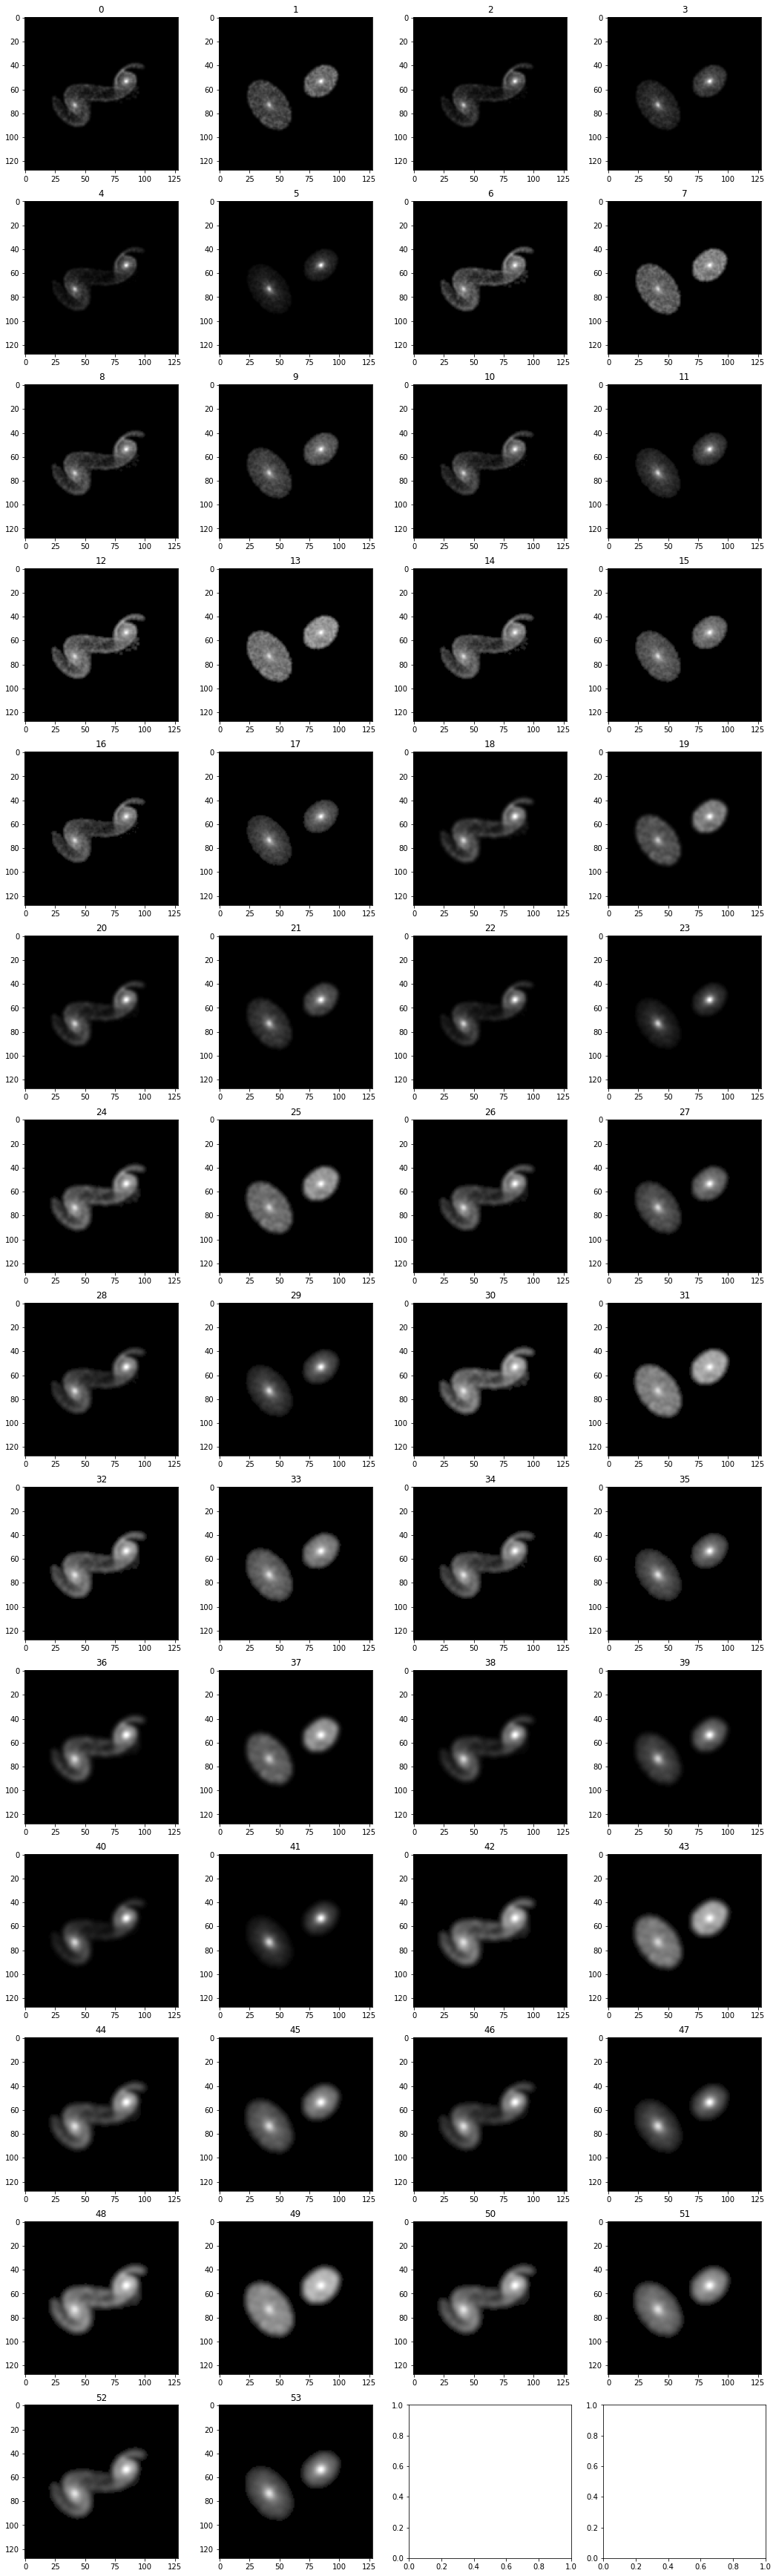

In [7]:

if True:

    # Get images
    imgList = []
    allParams = tInfo.get('score_parameters')
    for imgName in allParams.keys(): 
        print( imgName )
        if 'dl-s2-1' not in imgName:
            continue
        if 'base' in imgName:
            newImg1 = rInfo.getModelImage( imgName, imgType='model' )
            newImg2 = rInfo.getModelImage( imgName, imgType='init' )
            print( 'baseMaxes: ', np.amax( newImg1 ), np.amax( newImg2 ) )

            imgList.append( newImg1 )
            imgList.append( newImg2 )
    gm.showImgList( imgList, size=18, col_count=4 )
    



In [10]:
if False:

    # Get images
    imgList = []
    for imgName in newParams: 
        print( imgName )
        if 'many' in imgName:
            newImgList = rInfo.getModelImage( imgName, imgType='many_endings' )
            for newImg in newImgList:
                imgList.append( newImg  )
            break
            

    gm.showImgList( imgList, size=18, col_count=3 )

In [ ]:
paramDir = '../param/' 
print( 'paramDir: ', os.listdir(paramDir) )
gm.saveJson( mySet, paramDir + 'mySet.json' )

tInfo.addImageParams( newParams )
tInfo.saveScoreParam( newParams, 'dl-s2-1' )
tInfo.saveInfoFile()

paramDir:  ['zoo_test_3.json', 'cmd_args_test.json', 'graham_ms.json', 'exp_0_ms.json', 'exp_3_ga.json', 'dl-s1-0.json', 'sim2k_zoo100x100_mic_score.json', 'norm_chime_1.json', 'exp_2_ms.json', 'param_zoo_test.json', 'dl-test-s2-0.json', 'exp_2_cmd.json', 'norm_wndchrm_all_test.json', 'chime_test.json', 'zoo_test.json', 'dl-s2-1-many-test-2.json', 'nn_score_param_base.json', 'exp_2_ga.json', 'zoo_blank.json', 'exp_4_ms.json', 'exp_4_ga.json', 'chime_group_1.json', 'nn_train_base.json', 'init_ga_param.json', 'exp_0_ga.json', 'ga_param_test.json', 'start_param.json', 'zoo_base.json', '.ipynb_checkpoints', 'test_param.json', 'mySet.json', 'dl-s2-0.json', 'chime_group_0.json', 'dl-s1-seed.json', 'exp_base.json', 'mask_roi_blank.json']


In [ ]:
infoDir = tInfo.get('infoDir')
print( 'infoLoc: ', infoDir )
print( os.listdir( infoDir))
srcDir = infoDir + 'score_parameters/'
print( os.listdir( srcDir ))

cpParam = gm.readJson( srcDir + 'dl-s2-1.json' )
print( len( list( cpParam.keys())) )

infoLoc:  /home/jovyan/galStuff/spam-data-2022-11/587722984435351614/information/
['wndchrm_files', 'target.meta', 'score_parameters', 'scores.csv', 'target.pair', 'base_target_info.json', 'target_info.json', 'target_masks', 'base_scores.csv', 'target_images']
['chime_0.json', 'dl-s2-1.json', 'dl-s2-0.json', 'zoo_0_direct_scores.json']
54


In [42]:
# Create function to search for a file in current directory and all parent directories
def findFile( fileName, startDir=None, maxDepth=10 ):
    if startDir is None:
        startDir = os.getcwd()
        # Append '/' if not present
        if startDir[-1] != '/':
            startDir += '/'
    if not os.path.isdir( startDir ):
        print( 'ERROR: startDir is not a directory')
        print( 'startDir: ', startDir )
        return None
    if maxDepth < 0:
        print( 'ERROR: maxDepth is less than 0')
        return None
    if fileName in os.listdir( startDir ):
        # Return absolute path
        return os.path.abspath( startDir + fileName )
    else:
        return findFile( fileName, startDir + '../', maxDepth-1 )

print( findFile( 'main_SIMR.py' ) )

/home/jovyan/galStuff/galaxyJSPAM/main_SIMR.py


## Test if cmd arguments work

In [51]:
if True:
    
    cmdArgs = gm.inArgClass()
    cmdArgs.setArg( 'scoreParamName', "dl-s2-1" )
    cmdArgs.setArg( 'runInfo', rInfo )
    cmdArgs.setArg( 'newSim', True )
    cmdArgs.setArg( 'zipSim', True )
    cmdArgs.setArg( 'newImage', True )
    cmdArgs.setArg( 'overWrite', False )
    cmdArgs.setArg( 'printAll', False )

    #rInfo.printAll = True
    # SIMR.run_new_score( cmdArgs, rInfo )

    

    cmd = 'python3 %s' % findFile( 'main_SIMR.py' )
    cmd += ' -targetDir %s' % findFile( 'targetDir')
    cmd += ' -scoreParamName dl-s2-1 -newSim -zipSim -newImage -printAll' 

    testCmd = cmd + ' -startRun 2 -endRun 4'

    print( 'test CMD: ', testCmd )

    print( 'cmd: ', cmd )

    runDir = findFile( 'runs' )
    if runDir[-1] != '/':  runDir += '/'
    print( 'runDir: ', runDir )


    

    # Get machine name
    machineName = os.uname()[1]
    print( 'machineName: ', machineName )
    
    # Save cmd in runs directory
    shLoc = runDir + 'dl-s2-1-0-%s.sh' % machineName
    print( 'shLoc: ', shLoc )
    with open( shLoc, 'w' ) as f:
        f.write( cmd + '\n' )
    
    
    # Save test cmd in runs directory
    shLoc = runDir + 'test-dl-s2-1-0-%s.sh' % machineName
    print( 'shLoc: ', shLoc )
    with open( shLoc, 'w' ) as f:
        f.write( testCmd + '\n' )



test CMD:  python3 /home/jovyan/galStuff/galaxyJSPAM/main_SIMR.py -targetDir /home/jovyan/galStuff/galaxyJSPAM/targetDir -scoreParamName dl-s2-1 -newSim -zipSim -newImage -printAll -startRun 2 -endRun 4
cmd:  python3 /home/jovyan/galStuff/galaxyJSPAM/main_SIMR.py -targetDir /home/jovyan/galStuff/galaxyJSPAM/targetDir -scoreParamName dl-s2-1 -newSim -zipSim -newImage -printAll
runDir:  /home/jovyan/galStuff/runs/
machineName:  8b88e4aa52ff
shLoc:  /home/jovyan/galStuff/runs/dl-s2-1-0-8b88e4aa52ff.sh
shLoc:  /home/jovyan/galStuff/runs/test-dl-s2-1-0-8b88e4aa52ff.sh


In [45]:
print( 'runDir: ', findFile( 'runs' ))

runDir:  /home/jovyan/galStuff/runs
